In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math




In [39]:
from scipy.odr import *

def funcArr(p, x):
            a,b,c, = p
            return a*np.exp( np.divide(- b, x-c) )

def get_beta_nox(xt,r,dr, func, init, overwrite=False):

    data_c = [[x[0],x[1],x[2]] for x in zip(xt,r,dr) if x[0]>0 or x[1]>0]

    xt_c , r_c, dr_c = list(zip(*data_c))
    # Create a model for fitting.
    quad_model = Model(func)
    # Create a RealData object using our initiated data from above.
    data_free = RealData( np.array(xt_c),np.array(r_c), sy=np.array(dr_c))
    # Set up ODR with the model and data.
    odr = ODR(data_free, quad_model, beta0=init)
    # Run the regression.
    out = odr.run()


    return out.beta, func



/usr/local/lib/python3.9/site-packages/scipy/odr/_odrpack.py:394: RuntimeWarning: divide by zero encountered in true_divide
  return 1./numpy.power(sd, 2)
/usr/local/lib/python3.9/site-packages/scipy/odr/_odrpack.py:394: RuntimeWarning: divide by zero encountered in true_divide
  return 1./numpy.power(sd, 2)


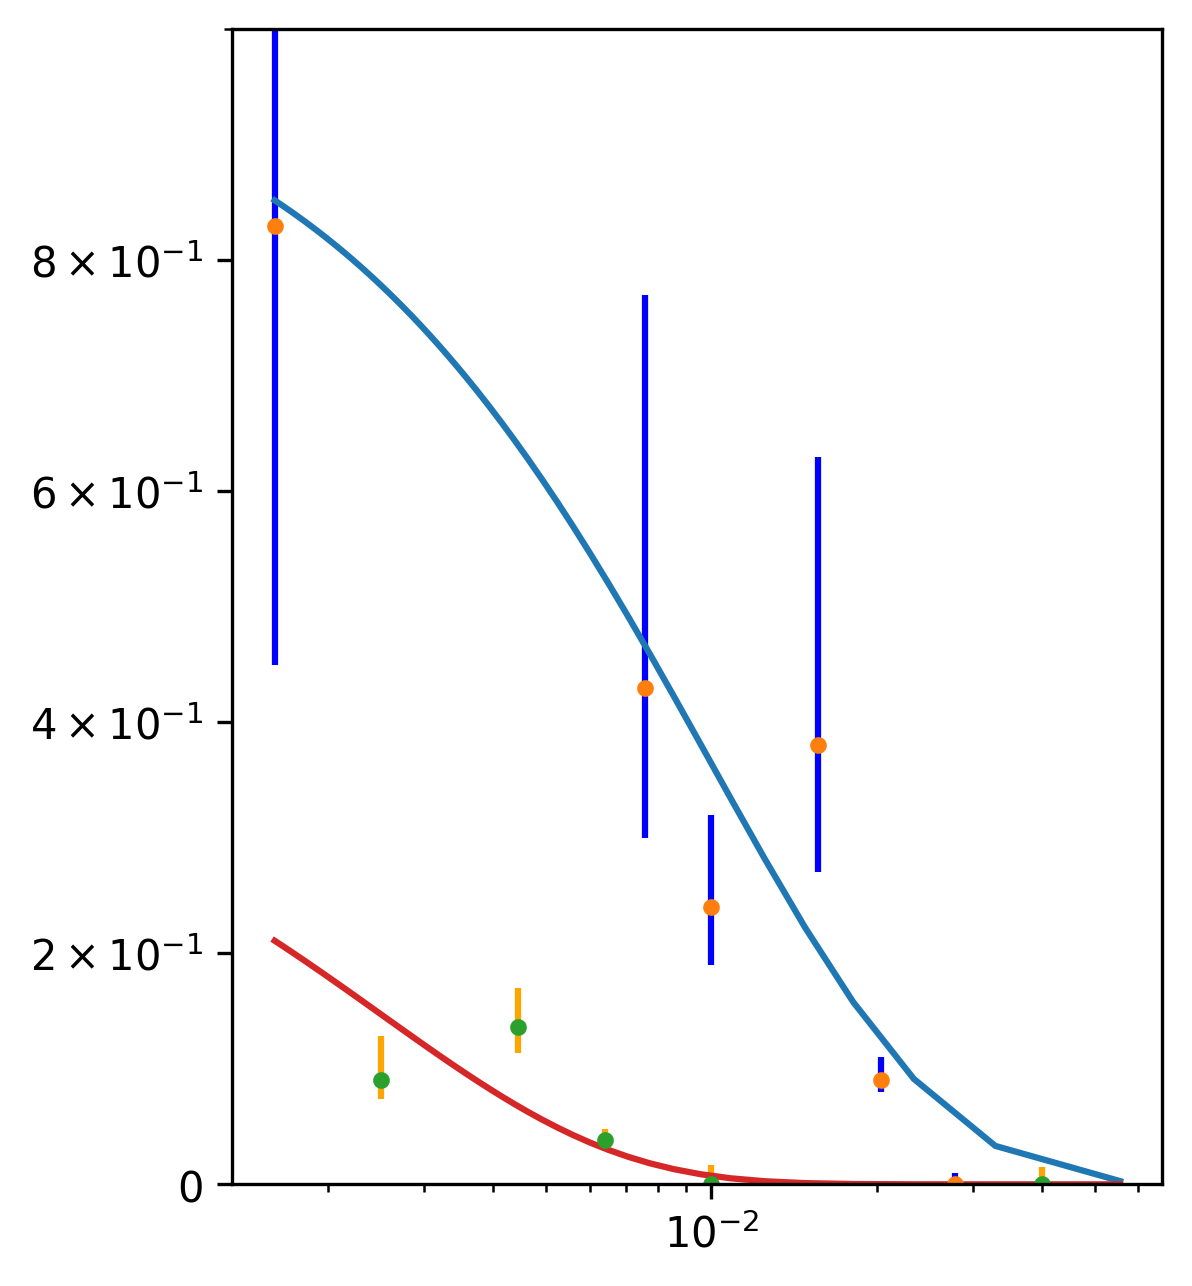

In [68]:
binded_res = ((60, 0.00, 0.00, 0.01),( 70, 0.09, 0.08, 0.11),( 80, 0.38, 0.27, 0.63),( 100 , 0.24, 0.19, 0.32),( 115 , 0.43, 0.30, 0.77),(250,0.83,0.45,5.15))
free_res = ((50,0.000,0.000,0.015),(100,0.000,0.000,0.017),(125,0.038,0.032,0.048),(150,0.136,0.114,0.170),(200,0.09,0.074,0.128))

radius = 0.1 #m

def approx_temp(angular_velocity):
    return  (angular_velocity*radius)**2



xrange = [25,300]
yrange = [0,1.0]


Txs = [  approx_temp(x[0]) for x in binded_res]
xs = [  1/approx_temp(x[0]) for x in binded_res]
ys = [x[1] for x in binded_res]
lower_error = [x[1]-x[2] for x in binded_res]
upper_error = [x[3]-x[1] for x in binded_res]
asymmetric_error = np.array(list(zip(lower_error, upper_error))).T

fitx = np.linspace(0.5*min(Txs),max(Txs), 50)

plt.figure(figsize=(4, 5), dpi=300)

plt.yscale("symlog")
plt.xscale("log")

#plt.xticks([50,100,200,400])
#plt.xlim(xrange)
plt.ylim(yrange)
plt.yticks(np.arange(yrange[0], yrange[1], 0.2))


param, f= get_beta_nox(xs,ys,lower_error , funcArr, [1,100,1])

fitted = [f(param, x) for x in fitx]
plt.plot(1/np.array(fitx), fitted)
plt.errorbar(xs, ys, yerr=asymmetric_error, fmt='.', ecolor = 'blue')

Txs = [  approx_temp(x[0]) for x in binded_res]
xs = [1/approx_temp(x[0]) for x in free_res]
ys = [x[1] for x in free_res]
lower_error = [x[1]-x[2] for x in free_res]
upper_error = [x[3]-x[1] for x in free_res]
asymmetric_error = np.array(list(zip(lower_error, upper_error))).T
plt.errorbar(xs, ys, yerr=asymmetric_error, fmt='.', ecolor = 'orange')


param, f= get_beta_nox(xs,ys,lower_error , funcArr, [0.4,400,0])

fitted = [f(param, x) for x in fitx]
plt.plot(1/np.array(fitx), fitted)



plt.savefig('/Users/mathieuouellet/Desktop/AMP/Figures/experiment_rate.svg')


plt.show()